In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
#below line allows matplotlib plots to appear in cell output
%matplotlib inline

## **Question 1**: Reading Data

### Part a: Data Loading Function

[np.loadtxt documentation](https://numpy.org/doc/1.19/reference/generated/numpy.loadtxt.html)

Write a function `load_pendulum_data(filename)` that loads experimental pendulum data from a text file using `np.loadtxt()`. The data file contains three columns:
1. Length of pendulum (meters)
2. Measured period (seconds) 
3. Uncertainty in period measurement (seconds)

The file has header lines starting with '#' that should be skipped.

**Requirements:**
- Use `np.loadtxt()` with appropriate parameters to skip header lines
- Return a tuple of three numpy arrays: `(lengths, periods, uncertainties)`

**Parameters:**
- `filename`: string path to the data file

**Returns:**
- Tuple `(lengths, periods, uncertainties)` where each is a 1D numpy array

In [2]:
def load_pendulum_data(filename):
    # BEGIN SOLUTION NO PROMPT
    # Load data using np.loadtxt, skipping comment lines that start with '#'
    data = np.loadtxt(filename, comments='#')
    
    # Extract the three columns
    lengths = data[:, 0]  # First column: lengths (m)
    periods = data[:, 1]  # Second column: periods (s)
    uncertainties = data[:, 2]  # Third column: uncertainties (s)
    
    return (lengths, periods, uncertainties)
    
    # END SOLUTION
    """ # BEGIN PROMPT
    # Write your code here!
    return (lengths, periods, uncertainties)
    """; # END PROMPT

In [ ]:
grader.check("q1a")

### Part b: Gravity Calculation from Pendulum Data

Using the data loading function from Part 1, write a function `calculate_gravity_from_pendulum(filename)` that:

1. **Loads the pendulum data** using your `load_pendulum_data()` function
2. **Calculates gravitational acceleration** from each measurement using the pendulum formula:
   $$g = \frac{4\pi^2 L}{T^2}$$
   This is from:
   $$T = 2\pi\sqrt{\frac{L}{g}}$$
   where L is length (m) and T is period (s)
3. **Computes statistics** on the calculated g values:
   - Mean value of g
   - Standard deviation of g values
   - Weighted mean using measurement uncertainties (optional: you can assume equal weights)

**Parameters:**
- `filename`: string path to the pendulum data file

**Returns:**
- Tuple `(mean_g, std_g, individual_g_values)` where:
  - `mean_g`: float, mean gravitational acceleration (m/s²)
  - `std_g`: float, standard deviation of g values (m/s²)
  - `individual_g_values`: numpy array of all calculated g values (m/s²)

**Hint:** Use `np.mean()` and `np.std()` for statistics calculations.

In [5]:
def calculate_gravity_from_pendulum(filename):
    # BEGIN SOLUTION NO PROMPT
    # Load the pendulum data using our function from Part 1
    lengths, periods, uncertainties = load_pendulum_data(filename)
    
    
    # Calculate gravitational acceleration for each measurement
    # g = 4π²L/T²
    individual_g_values = (4 * np.pi**2 * lengths) / (periods**2)
    
    # Calculate statistics
    mean_g = np.mean(individual_g_values)
    std_g = np.std(individual_g_values)
    
    return (mean_g, std_g, individual_g_values)
    # END SOLUTION
    """ # BEGIN PROMPT
    # Write your code here!
    return (mean_g, std_g, individual_g_values)
    """; # END PROMPT

In [ ]:
grader.check("q1b")

## **Question 2**: Plotting with Matplotlib

### Part a: Polynomial Functions Plot

Write a function `plot_polynomial_functions(show_plot=False)` that creates a plot of three polynomial functions on the interval [-1, 1]:
- f₁(x) = x
- f₂(x) = x²
- f₃(x) = x³

**Requirements:**
- Use `np.linspace(-1, 1, 100)` to create the x-values
- Plot all three functions on the same figure
- Include a legend with labels "x", "x²", "x³" (use `label=r"$x^2$"` in `ax.plot(...)`)
- Add appropriate axis labels and a title
- The function should return the matplotlib figure object

**Parameters:**
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

In [8]:
def plot_polynomial_functions(show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Create x values using linspace
    x = np.linspace(-1, 1, 100)
    
    # Calculate the polynomial functions
    y1 = x          # f₁(x) = x
    y2 = x**2       # f₂(x) = x²
    y3 = x**3       # f₃(x) = x³
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot the three functions
    ax.plot(x, y1, label=r"$x$", linewidth=2)
    ax.plot(x, y2, label=r"$x^2$", linewidth=2)
    ax.plot(x, y3, label=r"$x^3$", linewidth=2)
    
    # Add labels and title
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.set_title('Polynomial Functions')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Create x values using linspace
    x = np.linspace(-1, 1, 100)
    #create the plot object
    fig, ax = plt.subplots(figsize=(8, 6))
    # Write your code here!
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

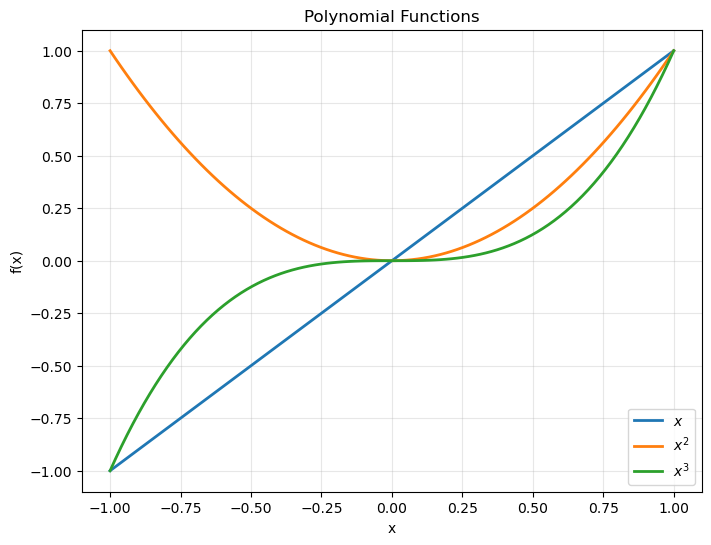

In [9]:
#cell to view the plot
plot_polynomial_functions(show_plot=True);

In [ ]:
grader.check("q2a")

### Part b: Sine Wave Modes Plot

Write a function `plot_sine_modes(n_modes, show_plot=False)` that plots sine wave modes on the unit interval [0, 1]. These represent standing wave patterns that are zero at both endpoints (x=0 and x=1).

The nth mode is given by:
$$f_n(x) = \sin(n\pi x)$$

This ensures that f_n(0) = 0 and f_n(1) = 0 for all positive integer values of n.

**Requirements:**
- Use `np.linspace(0, 1, 100)` to create x-values on the unit interval
- Plot the first `n_modes` sine modes (n = 1, 2, 3, ..., n_modes)
- Include a legend with labels "Mode 1", "Mode 2", etc.
- Set x-axis label to "Position"
- Set y-axis label to "Amplitude"
- Set title to "Sine Wave Modes"
- Set xlim to [0, 1] and ylim to [-1.1, 1.1]
- The function should return the matplotlib figure object

**Parameters:**
- `n_modes`: integer, number of ascending sine modes to plot (starting from n=1)
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

Hint: Put your `ax.plot(...)` statement in a for loop so the plotting function works for general n

In [13]:
def plot_sine_modes(n_modes, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Create x values on the unit interval [0, 1]
    x = np.linspace(0, 1, 100)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot each mode
    for n in range(1, n_modes + 1):
        # Calculate the nth sine mode: sin(n*pi*x)
        y = np.sin(n * np.pi * x)
        
        # Plot with appropriate label
        ax.plot(x, y, label=f'Mode {n}', linewidth=2)
    
    # Set labels and title
    ax.set_xlabel('Position')
    ax.set_ylabel('Amplitude')
    ax.set_title('Sine Wave Modes')
    
    # Set limits
    ax.set_xlim([0, 1])
    ax.set_ylim([-1.1, 1.1])
    
    # Add legend and grid
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Create x values on the unit interval [0, 1]
    x = np.linspace(0, 1, 100)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Write your code here!
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

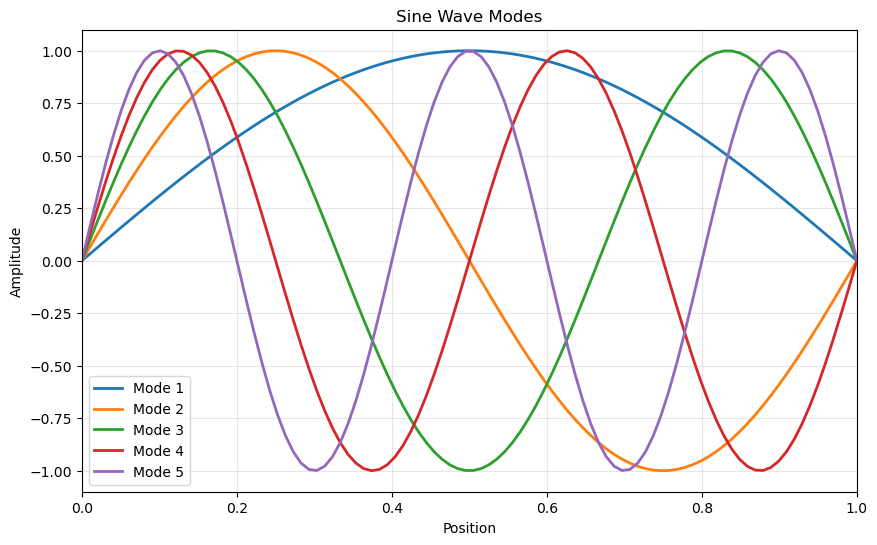

In [14]:
#cell to view your plot
n = 5 #try different values here
plot_sine_modes(n, show_plot=True);

In [ ]:
grader.check("q2b")

## **Question 3**: Error Bar Plotting

Write a function `plot_pendulum_data(filename, show_plot=False)` that creates an error bar plot of the pendulum experimental data using `plt.errorbar()`.

[plt.errorbar documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

**Requirements:**
- Load the pendulum data using your `load_pendulum_data()` function from Question 1
- Create an error bar plot with:
  - X-axis: pendulum length (m)
  - Y-axis: period (s) 
  - Error bars: period uncertainties (s)
- Set x-axis label to "Pendulum Length (m)"
- Set y-axis label to "Period (s)"
- Set title to "Pendulum Period vs Length"
- Set xlim to [0.2, 1.05] and ylim to [0.8, 2.2]
- Use marker style 'o' and set capsize=5 for error bar caps
- Add a grid with alpha=0.3
- The function should return the matplotlib figure object

**Parameters:**
- `filename`: string path to the pendulum data file
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

**Hint:** `ax.errorbar(x, y, yerr=uncertainties, fmt='o', capsize=5)` for the error bar plot.

In [20]:
def plot_pendulum_data(filename, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Load the pendulum data using the function from Question 1
    lengths, periods, uncertainties = load_pendulum_data(filename)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create error bar plot
    ax.errorbar(lengths, periods, yerr=uncertainties, fmt='o', capsize=5, 
                markersize=6, linewidth=1.5, elinewidth=1.5)
    
    # Set labels and title
    ax.set_xlabel('Pendulum Length (m)')
    ax.set_ylabel('Period (s)')
    ax.set_title('Pendulum Period vs Length')
    
    # Set limits
    ax.set_xlim([0.2, 1.05])
    ax.set_ylim([0.8, 2.2])
    
    # Add grid
    ax.grid(True, alpha=0.3)
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the pendulum data using the function from Question 1
    lengths, periods, uncertainties = load_pendulum_data(filename)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Write your code here!
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

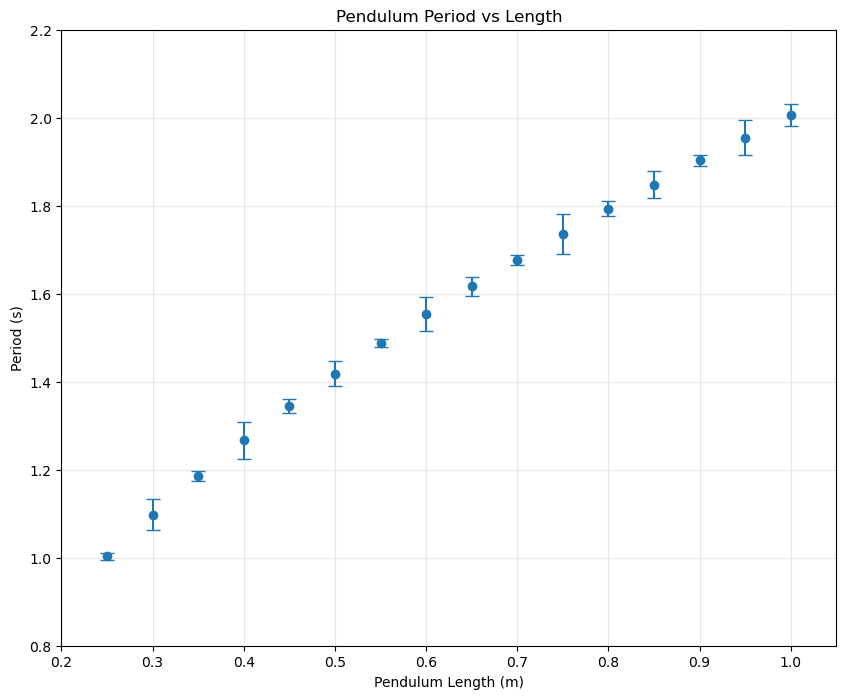

In [21]:
# Cell to view your plot
plot_pendulum_data('pendulum_data.txt', show_plot=True);

In [ ]:
grader.check("q3")

## **Question 4**: 2D Data Visualization

### Part a: 2D Data Loading Function

Write a function `load_heat_data(filename)` that loads 2D temperature data from a text file using `np.loadtxt()`. The data file represents temperature measurements on a 2D plate, where each row corresponds to a y-position and each column corresponds to an x-position.

The file has header lines starting with '#' that should be skipped.

**Requirements:**
- Use `np.loadtxt()` with appropriate parameters to skip header lines
- Return the data as a 2D numpy array where `data[i, j]` represents temperature at position (x=j, y=i)

**Parameters:**
- `filename`: string path to the data file

**Returns:**
- `data`: 2D numpy array containing the temperature data

In [27]:
def load_heat_data(filename):
    # BEGIN SOLUTION NO PROMPT
    # Load 2D data using np.loadtxt, skipping comment lines that start with '#'
    data = np.loadtxt(filename, comments='#')
    return data
    # END SOLUTION
    """ # BEGIN PROMPT
    # Write your code here!
    return data
    """; # END PROMPT

In [ ]:
grader.check("q4a")

### Part b: Heatmap Visualization

Write a function `plot_heat_heatmap(filename, show_plot=False)` that creates a heatmap visualization of the 2D temperature data using `plt.imshow()`.

[plt.imshow documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)

**Requirements:**
- Load the heat data using your `load_heat_data()` function from Part a
- Create a heatmap using `plt.imshow()` with:
  - Colormap: 'hot' (use `cmap='hot'`)
  - Origin at lower-left: `origin='lower'`
  - Aspect ratio: 'equal'
- Add a colorbar with label "Temperature (°C)"
- Set x-axis label to "X Position"
- Set y-axis label to "Y Position"  
- Set title to "Temperature Distribution Heatmap"
- The function should return the matplotlib figure object

**Parameters:**
- `filename`: string path to the heat data file
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

**Hint:** Use `plt.colorbar(im, label='Temperature (°C)')` where `im` is the result of `ax.imshow()`.

In [30]:
def plot_heat_heatmap(filename, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Load the heat data using the function from Part a
    data = load_heat_data(filename)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create heatmap using imshow
    im = ax.imshow(data, cmap='hot', origin='lower', aspect='equal')
    
    # Add colorbar
    plt.colorbar(im, label='Temperature (°C)')
    
    # Set labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_title('Temperature Distribution Heatmap')
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the heat data using the function from Part a
    data = load_heat_data(filename)
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Write your code here!
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

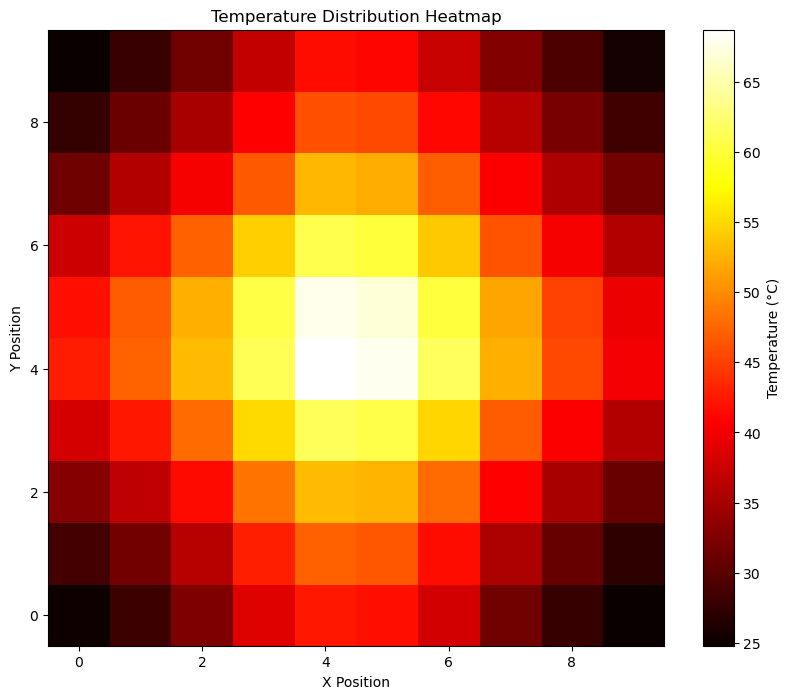

In [31]:
# Cell to view your heatmap
plot_heat_heatmap('heat_plate_data.txt', show_plot=True);

In [ ]:
grader.check("q4b")

### Part c: 3D Surface Plot

Write a function `plot_heat_surface(filename, show_plot=False)` that creates a 3D surface plot of the temperature data using `ax.plot_surface()`.

**Requirements:**
- Load the heat data using your `load_heat_data()` function from Part a
- Create coordinate meshgrids using `np.meshgrid()` for the x and y coordinates
- Create a 3D subplot using `fig.add_subplot(111, projection='3d')`
- Create a surface plot using `ax.plot_surface()` with:
  - Colormap: 'coolwarm' (use `cmap='coolwarm'`)
  - Alpha: 0.9
- Set x-axis label to "X Position"
- Set y-axis label to "Y Position"
- Set z-axis label to "Temperature (°C)"
- Set title to "3D Temperature Distribution"
- The function should return the matplotlib figure object

**Parameters:**
- `filename`: string path to the heat data file
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

In [35]:
def plot_heat_surface(filename, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Load the heat data using the function from Part a
    data = load_heat_data(filename)
    
    # Create coordinate meshgrids
    X, Y = np.meshgrid(range(data.shape[1]), range(data.shape[0]))
    
    # Create the figure and 3D subplot
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create surface plot
    surface = ax.plot_surface(X, Y, data, cmap='coolwarm', alpha=0.9)
    
    # Set labels and title
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Temperature (°C)')
    ax.set_title('3D Temperature Distribution')
    
    # Adjust aspect ratio to prevent label cutoff
    ax.set_box_aspect((1, 1, 1))
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the heat data using the function from Part a
    data = load_heat_data(filename)
    
    # Create coordinate meshgrids
    X, Y = np.meshgrid(range(data.shape[1]), range(data.shape[0]))
    
    # Create the figure and 3D subplot
    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')
    
    # Write your code here!
    
    # Adjust aspect ratio to prevent label cutoff
    ax.set_box_aspect((1, 1, 1))
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

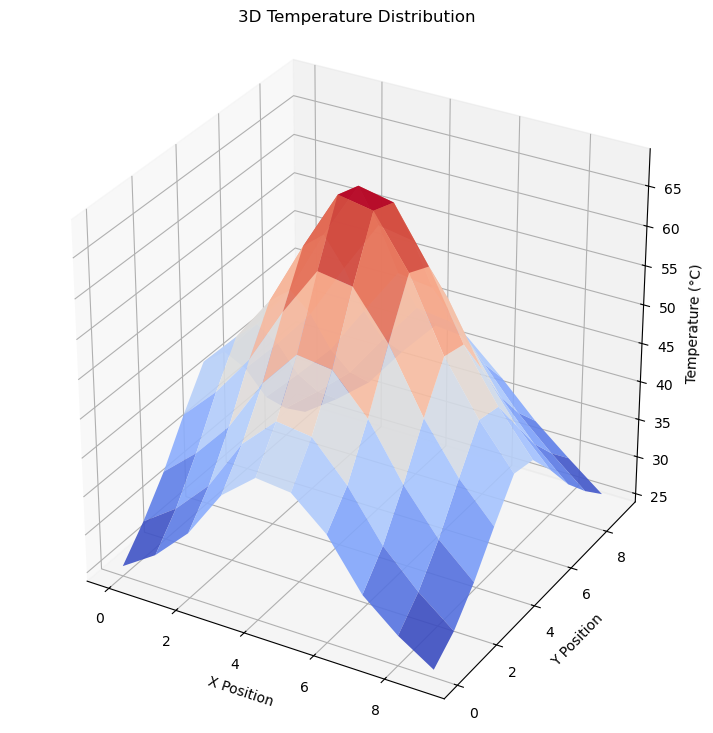

In [36]:
# Cell to view your 3D surface plot
plot_heat_surface('heat_plate_data.txt', show_plot=True);

In [ ]:
grader.check("q4c")

## **Question 5**

### Part a: Gaussian Data Loading Function

Write a function `load_gaussian_data(filename)` that loads Gaussian distribution samples from a text file using `np.loadtxt()`. The data file contains one sample per line, representing values drawn from a Gaussian (normal) distribution.

The file has header lines starting with '#' that should be skipped.

**Requirements:**
- Use `np.loadtxt()` with appropriate parameters to skip header lines
- Return a 1D numpy array containing the sample values

**Parameters:**
- `filename`: string path to the data file

**Returns:**
- `data`: 1D numpy array containing the Gaussian samples

In [40]:
def load_gaussian_data(filename):
    # BEGIN SOLUTION NO PROMPT
    # Load data using np.loadtxt, skipping comment lines that start with '#'
    data = np.loadtxt(filename, comments='#')
    return data
    # END SOLUTION
    """ # BEGIN PROMPT
    # Write your code here!
    return data
    """; # END PROMPT

In [ ]:
grader.check("q5a")

### Part b: Histogram and PDF Comparison Plot

Write a function `plot_gaussian_histogram(filename, show_plot=False)` that creates a histogram of the Gaussian data samples and overlays the theoretical probability density function (PDF) of the original Gaussian distribution.

The data was generated from a Gaussian distribution with:
- **Mean (μ) = 5.2**
- **Variance (σ²) = 2.8**

The probability density function for a Gaussian distribution is:
$$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

**Requirements:**
- Load the Gaussian data using your `load_gaussian_data()` function from Part a
- Create a histogram of the data with 30 bins using `plt.hist()` with `density=True` to normalize
- Calculate the theoretical PDF using the given mean and variance
- Plot the PDF as a smooth curve over the same x-range as the histogram
- Use `np.linspace()` to create x-values for the PDF curve (suggest 200 points)
- Set x-axis label to "Value"
- Set y-axis label to "Density"
- Set title to "Gaussian Data Histogram vs Theoretical PDF"
- Add a legend with labels "Data Histogram" and "Theoretical PDF"
- The function should return the matplotlib figure object

**Parameters:**
- `filename`: string path to the Gaussian data file
- `show_plot`: boolean, default False. If True, call `plt.show()` to display the plot

**Returns:**
- `fig`: matplotlib figure object

**Hint:** Use numpy functions to vectorize your calculation of the gaussian PDF function. Plot histogram using ax.hist()

In [43]:
def plot_gaussian_histogram(filename, show_plot=False):
    # BEGIN SOLUTION NO PROMPT
    # Load the Gaussian data using the function from Part a
    data = load_gaussian_data(filename)
    
    # Given parameters from the original distribution
    mu = 5.2  # mean
    variance = 2.8  # variance
    sigma = np.sqrt(variance)  # standard deviation
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create histogram with density=True for normalization
    ax.hist(data, bins=30, density=True, alpha=0.7, color='skyblue', 
            edgecolor='black', label='Data Histogram')
    
    # Create x-values for the theoretical PDF curve
    x_min, x_max = np.min(data), np.max(data)
    x_range = x_max - x_min
    x_pdf = np.linspace(x_min - 0.1*x_range, x_max + 0.1*x_range, 200)
    
    # Calculate the theoretical PDF: f(x) = (1/(σ√(2π))) * exp(-(x-μ)²/(2σ²))
    pdf_values = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_pdf - mu) / sigma)**2)
    
    # Plot the theoretical PDF
    ax.plot(x_pdf, pdf_values, 'r-', linewidth=3, label='Theoretical PDF')
    
    # Set labels and title
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title('Gaussian Data Histogram vs Theoretical PDF')
    
    # Add legend and grid
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    # END SOLUTION
    """ # BEGIN PROMPT
    # Load the Gaussian data using the function from Part a
    data = load_gaussian_data(filename)
    
    # Given parameters from the original distribution
    mu = 5.2  # mean
    variance = 2.8  # variance
    sigma = np.sqrt(variance)  # standard deviation
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Write your code here!
    
    # Show plot if requested
    if show_plot:
        plt.show()
    
    return fig
    """; # END PROMPT

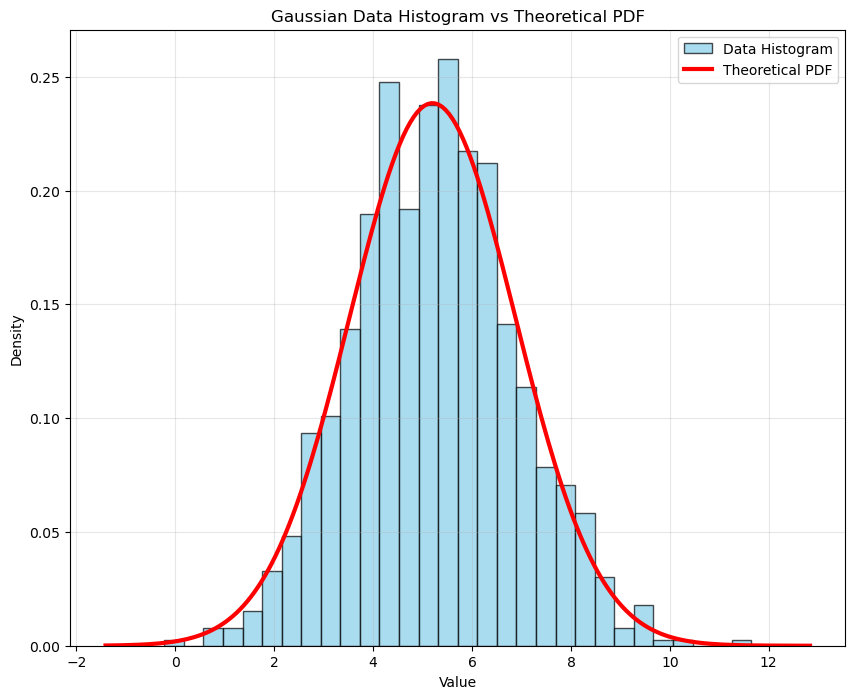

In [44]:
# Cell to view your plot
plot_gaussian_histogram('gaussian_data.txt', show_plot=True);

In [ ]:
grader.check("q5b")

## Required disclosure of use of AI technology

Please indicate whether you used AI to complete this homework. If you did, explain how you used it in the python cell below, as a comment.

In [50]:
# BEGIN SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
"""
# write ai disclosure here:

"""
"""; # END PROMPT

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit.

Upload the .zip file to Gradescope!

In [ ]:
grader.export(pdf=False, force_save=True, run_tests=True)